In [3]:
import cv2 as cv 
from matplotlib import pyplot as plt 
import numpy as np

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2176267d040>)

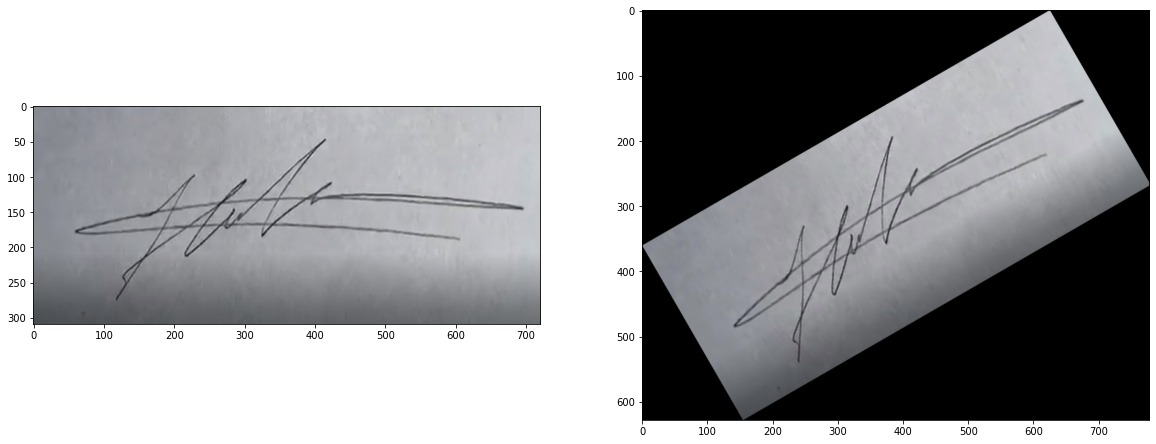

In [54]:
img1 = cv.imread('ref.jpg')
img2 = cv.imread('image.jpg')

plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1), plt.imshow(img1)
plt.subplot(1, 2, 2), plt.imshow(img2)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2176825ea30>)

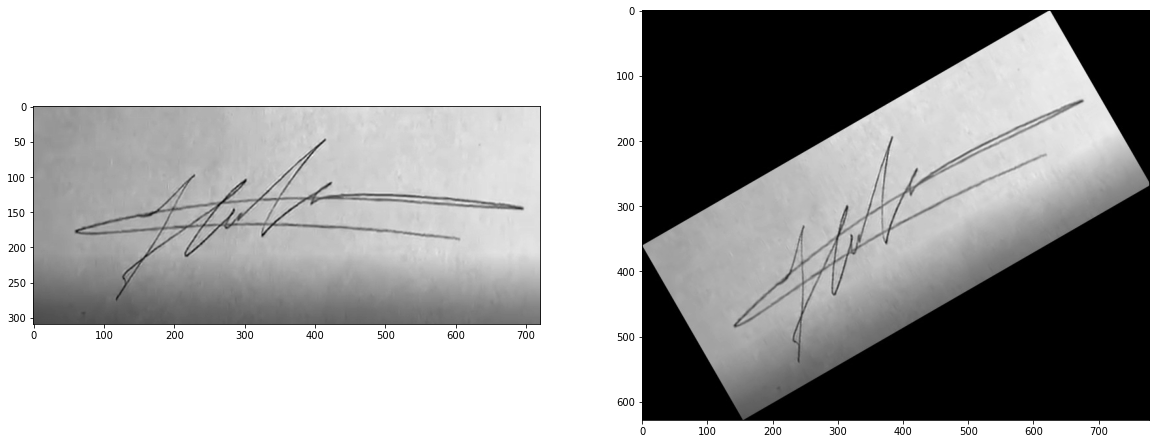

In [55]:
im1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
im2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1), plt.imshow(im1, cmap = 'gray')
plt.subplot(1, 2, 2), plt.imshow(im2, cmap = 'gray')

In [24]:
orb = cv.ORB_create(50)

kp1, des1 = orb.detectAndCompute(im1, None)
kp2, des2 = orb.detectAndCompute(im2, None)

print("Number of key points:", len(kp1))

Number of key points: 50


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x21762441b80>)

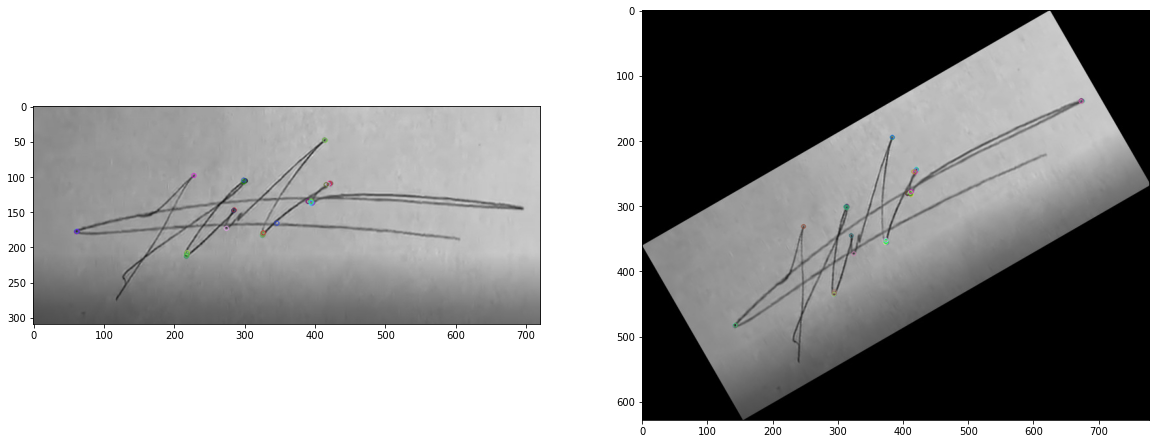

In [25]:
im3 = cv.drawKeypoints(im1, kp1, None)
im4 = cv.drawKeypoints(im2, kp2, None)

plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1), plt.imshow(im3, cmap = 'gray')
plt.subplot(1, 2, 2), plt.imshow(im4, cmap = 'gray')

In [27]:
matcher = cv.DescriptorMatcher_create(cv.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

matches = matcher.match(des1, des2, None)
matches = sorted(matches, key = lambda x:x.distance)

print("Number of matches:", len(matches))

Number of matches: 50


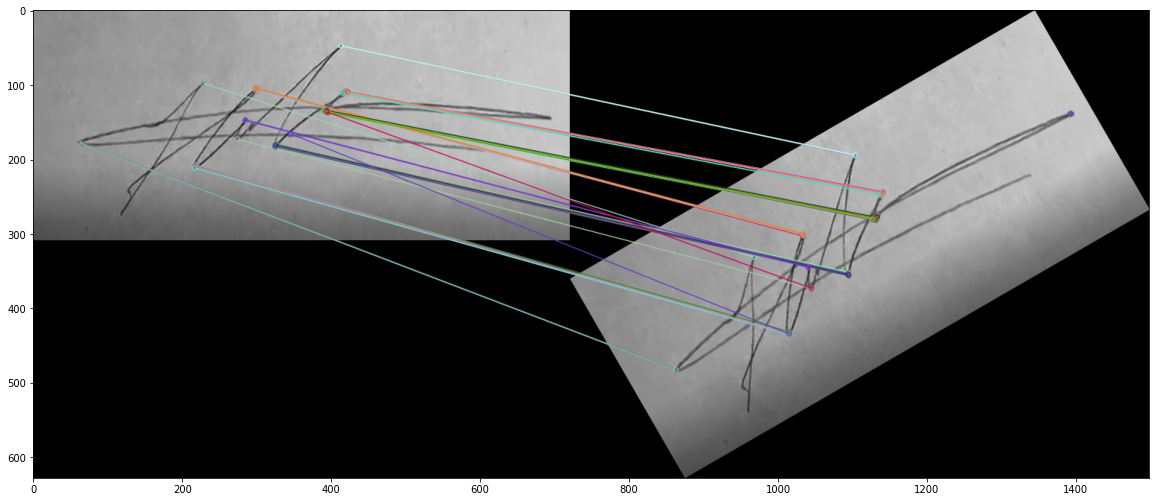

In [28]:
matches_img = cv.drawMatches(im1, kp1, im2, kp2, matches, None)

plt.figure(figsize=(20,20))
plt.imshow(matches_img, cmap = 'gray')

In [29]:
points1 = np.zeros((len(matches), 2), dtype = np.float32)
points2 = np.zeros((len(matches), 2), dtype = np.float32)

In [48]:
for i , match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt


In [50]:
h, mask = cv.findHomography(points2, points1, cv.RANSAC)
height, width, channels = img1.shape

im1Reg = cv.warpPerspective(img2, h, (width, height))


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x21762437460>)

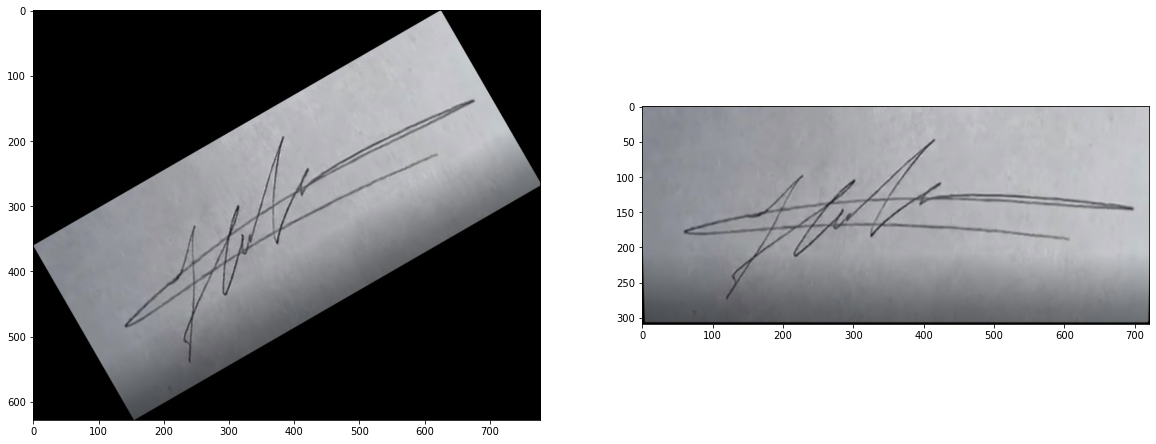

In [53]:
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1), plt.imshow(img2, cmap = 'gray')
plt.subplot(1, 2, 2), plt.imshow(im1Reg, cmap = 'gray')